In [1]:
import warnings
warnings.filterwarnings('ignore')

In [83]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
print(tf.__version__)

2.1.0


 - Auto MPG Dataset

In [4]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path


'C:\\Users\\lan41\\.keras\\datasets\\auto-mpg.data'

In [5]:
raw_dataset = pd.read_csv(dataset_path, header=None, sep='\s+')
columns = ['mpg' , 'cylinders' , 'displacement' , 'horsepower', 'weight' , 'acceleration', 'model year', 'origin' , 'name']
raw_dataset.columns = columns

In [6]:
raw_dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [7]:
copy_df = raw_dataset.copy()

In [8]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


## 데이터정제

##### `horsepower`

In [9]:
# 데이터정제
# horsepower칼럼에 `?` 가존재
copy_df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [10]:
copy_df['horsepower'] = copy_df['horsepower'].replace('?', np.NaN).apply(float)

In [11]:
copy_df.isna().apply(sum)

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
name            0
dtype: int64

In [12]:
copy_df = copy_df.dropna(subset=['horsepower'], axis=0, inplace=False)

In [13]:
copy_df.shape

(392, 9)

##### `origin`

 - 숫자형으로 되어있기 때문에 

In [14]:
copy_df['origin'] = copy_df['origin'].astype(str)

In [15]:
copy_df.pop('name')
copy_df = pd.get_dummies(copy_df)

In [16]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin_1      392 non-null    uint8  
 8   origin_2      392 non-null    uint8  
 9   origin_3      392 non-null    uint8  
dtypes: float64(5), int64(2), uint8(3)
memory usage: 25.6 KB


## Train / Test 분할
   - tensorflow와 sklearn의 함수를 같이 쓰는 경우는 본적이 없다.
   - 그래서 tensorlow를 이용해 딥러닝을 사용하면서 sklearn의 train_test_split을 사용하지 않는편이 좋다
   - 그러므로 sklearn을 이용해 train / test를 나누는 것이 아니라, pandas의 sample 함수를 이용하여 train / test를 나눈다

In [17]:
train_set = copy_df.sample(frac=0.8, random_state=0)
test_set = copy_df.drop(train_set.index)

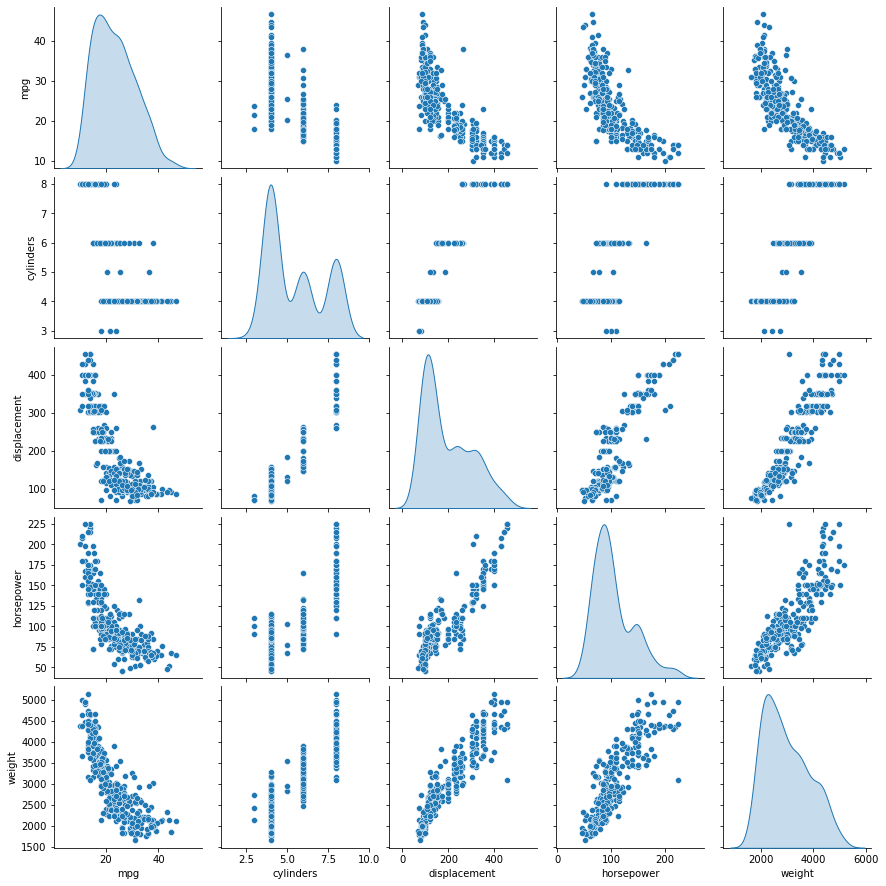

In [19]:
sns.pairplot(train_set[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight']], diag_kind='kde')

In [32]:
train_stats= train_set.describe().T

print(train_stats['mean'])
print(train_stats['std'])

cylinders          5.477707
displacement     195.318471
horsepower       104.869427
weight          2990.251592
acceleration      15.559236
model year        75.898089
origin_1           0.624204
origin_2           0.178344
origin_3           0.197452
Name: mean, dtype: float64
cylinders         1.699788
displacement    104.331589
horsepower       38.096214
weight          843.898596
acceleration      2.789230
model year        3.675642
origin_1          0.485101
origin_2          0.383413
origin_3          0.398712
Name: std, dtype: float64


In [31]:
X_train - train_stats['mean']

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
146,-1.477707,-105.318471,-29.869427,-865.251592,-1.059236,-1.898089,0.375796,-0.178344,-0.197452
282,-1.477707,-55.318471,-16.869427,-100.251592,1.740764,3.101911,0.375796,-0.178344,-0.197452
69,2.522293,154.681529,55.130573,1465.748408,-2.059236,-3.898089,0.375796,-0.178344,-0.197452
378,-1.477707,-90.318471,-41.869427,-865.251592,-0.859236,6.101911,0.375796,-0.178344,-0.197452
331,-1.477707,-98.318471,-37.869427,-845.251592,2.440764,4.101911,-0.624204,-0.178344,0.802548
...,...,...,...,...,...,...,...,...,...
281,0.522293,4.681529,-19.869427,-0.251592,2.640764,3.101911,0.375796,-0.178344,-0.197452
229,2.522293,204.681529,75.130573,1229.748408,-4.459236,1.101911,0.375796,-0.178344,-0.197452
150,-1.477707,-87.318471,-11.869427,-599.251592,-0.059236,-1.898089,-0.624204,-0.178344,0.802548
145,-1.477707,-112.318471,-43.869427,-987.251592,3.440764,-1.898089,-0.624204,-0.178344,0.802548


In [21]:
y_train = train_set.pop('mpg')
y_test  = test_set.pop('mpg')
X_train = train_set
X_test  = test_set 

In [26]:
# 데이터 정규화

def norm(df) :
    train_stats= df.describe().T
    return (df - train_stats['mean']) / train_stats['std']

In [43]:
X_train_norm = norm(X_train)
X_test_norm = norm(X_test)

In [59]:
# 모델 만들기


model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_set.keys())]),   # 은닉층
    layers.Dense(64, activation='relu'),   #
    layers.Dense(1)  # 출력층
])

optimizer = tf.keras.optimizers.RMSprop()

model.compile(loss      = 'mse',
              optimizer = optimizer,
              metrics   = ['mae', 'mse'])

In [57]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 5)                 50        
_________________________________________________________________
dense_10 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.fit(X_train_norm, y_train)

# # 2, 5
# Train on 314 samples
# 314/314 [==============================] - 1s 2ms/sample - loss: 609.8883 - mae: 23.4053 - mse: 609.8883

# 

Train on 314 samples
314/314 [==============================] - 1s 2ms/sample - loss: 582.2459 - mae: 22.8677 - mse: 582.2458


In [61]:
y_pred = model.predict(X_test_norm)

In [67]:
# 모델학습

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

    

# 훈련정확도와 검증 정확도 :history

history = model.fit(X_train_norm, y_train,
                    epochs=1000, validation_split=0.2, verbose=1)


Train on 251 samples, validate on 63 samples
Epoch 1/1000
251/251 [==============================] - 0s 600us/sample - loss: 531.1231 - mae: 21.7478 - mse: 531.1230 - val_loss: 526.1949 - val_mae: 21.5967 - val_mse: 526.1948
Epoch 2/1000
251/251 [==============================] - 0s 127us/sample - loss: 486.9827 - mae: 20.7332 - mse: 486.9828 - val_loss: 474.9014 - val_mae: 20.4027 - val_mse: 474.9014
Epoch 3/1000
251/251 [==============================] - 0s 139us/sample - loss: 436.5277 - mae: 19.5218 - mse: 436.5277 - val_loss: 416.2115 - val_mae: 18.9741 - val_mse: 416.2115
Epoch 4/1000
251/251 [==============================] - 0s 123us/sample - loss: 379.7578 - mae: 18.0955 - mse: 379.7578 - val_loss: 351.8943 - val_mae: 17.2802 - val_mse: 351.8943
Epoch 5/1000
251/251 [==============================] - 0s 127us/sample - loss: 320.1101 - mae: 16.4348 - mse: 320.1100 - val_loss: 287.8776 - val_mae: 15.4113 - val_mse: 287.8776
Epoch 6/1000
251/251 [==============================] -

Epoch 48/1000
251/251 [==============================] - 0s 107us/sample - loss: 6.9434 - mae: 1.8671 - mse: 6.9434 - val_loss: 9.2080 - val_mae: 2.2508 - val_mse: 9.2080
Epoch 49/1000
251/251 [==============================] - 0s 119us/sample - loss: 6.9547 - mae: 1.8669 - mse: 6.9547 - val_loss: 8.7910 - val_mae: 2.2738 - val_mse: 8.7910
Epoch 50/1000
251/251 [==============================] - 0s 119us/sample - loss: 7.0524 - mae: 1.9037 - mse: 7.0524 - val_loss: 8.9018 - val_mae: 2.2734 - val_mse: 8.9018
Epoch 51/1000
251/251 [==============================] - 0s 107us/sample - loss: 6.8214 - mae: 1.8655 - mse: 6.8214 - val_loss: 8.9079 - val_mae: 2.2511 - val_mse: 8.9079
Epoch 52/1000
251/251 [==============================] - 0s 107us/sample - loss: 6.8097 - mae: 1.8680 - mse: 6.8097 - val_loss: 8.5656 - val_mae: 2.2711 - val_mse: 8.5656
Epoch 53/1000
251/251 [==============================] - 0s 107us/sample - loss: 7.0030 - mae: 1.8829 - mse: 7.0030 - val_loss: 8.5829 - val_mae:

Epoch 96/1000
251/251 [==============================] - 0s 115us/sample - loss: 6.0320 - mae: 1.7065 - mse: 6.0320 - val_loss: 8.8417 - val_mae: 2.2108 - val_mse: 8.8417
Epoch 97/1000
251/251 [==============================] - 0s 115us/sample - loss: 5.9955 - mae: 1.7149 - mse: 5.9955 - val_loss: 8.9559 - val_mae: 2.1955 - val_mse: 8.9559
Epoch 98/1000
251/251 [==============================] - 0s 111us/sample - loss: 6.0148 - mae: 1.7281 - mse: 6.0148 - val_loss: 8.6766 - val_mae: 2.2725 - val_mse: 8.6766
Epoch 99/1000
251/251 [==============================] - 0s 111us/sample - loss: 5.8979 - mae: 1.6926 - mse: 5.8979 - val_loss: 8.7046 - val_mae: 2.2801 - val_mse: 8.7046
Epoch 100/1000
251/251 [==============================] - 0s 111us/sample - loss: 5.7927 - mae: 1.6918 - mse: 5.7927 - val_loss: 8.5681 - val_mae: 2.2390 - val_mse: 8.5681
Epoch 101/1000
251/251 [==============================] - 0s 123us/sample - loss: 5.8439 - mae: 1.7085 - mse: 5.8439 - val_loss: 8.7092 - val_ma

Epoch 144/1000
251/251 [==============================] - 0s 111us/sample - loss: 5.4979 - mae: 1.6494 - mse: 5.4979 - val_loss: 8.2852 - val_mae: 2.1771 - val_mse: 8.2852
Epoch 145/1000
251/251 [==============================] - 0s 115us/sample - loss: 5.6719 - mae: 1.6652 - mse: 5.6719 - val_loss: 8.4840 - val_mae: 2.2643 - val_mse: 8.4840
Epoch 146/1000
251/251 [==============================] - 0s 115us/sample - loss: 5.7287 - mae: 1.6436 - mse: 5.7287 - val_loss: 8.3164 - val_mae: 2.2008 - val_mse: 8.3164
Epoch 147/1000
251/251 [==============================] - 0s 115us/sample - loss: 5.4734 - mae: 1.6101 - mse: 5.4734 - val_loss: 8.3341 - val_mae: 2.1451 - val_mse: 8.3341
Epoch 148/1000
251/251 [==============================] - 0s 111us/sample - loss: 5.6147 - mae: 1.6315 - mse: 5.6147 - val_loss: 8.2529 - val_mae: 2.2054 - val_mse: 8.2529
Epoch 149/1000
251/251 [==============================] - 0s 123us/sample - loss: 5.6457 - mae: 1.6332 - mse: 5.6457 - val_loss: 8.6526 - va

Epoch 192/1000
251/251 [==============================] - 0s 127us/sample - loss: 5.2488 - mae: 1.5790 - mse: 5.2488 - val_loss: 8.2718 - val_mae: 2.1365 - val_mse: 8.2718
Epoch 193/1000
251/251 [==============================] - 0s 115us/sample - loss: 5.3371 - mae: 1.5711 - mse: 5.3371 - val_loss: 8.1217 - val_mae: 2.1401 - val_mse: 8.1217
Epoch 194/1000
251/251 [==============================] - 0s 115us/sample - loss: 5.1756 - mae: 1.5492 - mse: 5.1756 - val_loss: 8.2237 - val_mae: 2.1900 - val_mse: 8.2237
Epoch 195/1000
251/251 [==============================] - 0s 107us/sample - loss: 5.3586 - mae: 1.5832 - mse: 5.3586 - val_loss: 8.2475 - val_mae: 2.2000 - val_mse: 8.2475
Epoch 196/1000
251/251 [==============================] - 0s 115us/sample - loss: 5.2991 - mae: 1.5837 - mse: 5.2991 - val_loss: 8.3845 - val_mae: 2.2071 - val_mse: 8.3845
Epoch 197/1000
251/251 [==============================] - 0s 107us/sample - loss: 5.2015 - mae: 1.5634 - mse: 5.2015 - val_loss: 8.1575 - va

Epoch 240/1000
251/251 [==============================] - 0s 147us/sample - loss: 4.9242 - mae: 1.5297 - mse: 4.9242 - val_loss: 8.9912 - val_mae: 2.1705 - val_mse: 8.9912
Epoch 241/1000
251/251 [==============================] - 0s 151us/sample - loss: 4.9785 - mae: 1.5437 - mse: 4.9785 - val_loss: 8.1887 - val_mae: 2.1824 - val_mse: 8.1887
Epoch 242/1000
251/251 [==============================] - 0s 167us/sample - loss: 4.9430 - mae: 1.5240 - mse: 4.9430 - val_loss: 8.6205 - val_mae: 2.2575 - val_mse: 8.6205
Epoch 243/1000
251/251 [==============================] - 0s 163us/sample - loss: 5.2170 - mae: 1.5591 - mse: 5.2170 - val_loss: 8.7305 - val_mae: 2.1582 - val_mse: 8.7305
Epoch 244/1000
251/251 [==============================] - 0s 155us/sample - loss: 5.0957 - mae: 1.5371 - mse: 5.0957 - val_loss: 8.3605 - val_mae: 2.2115 - val_mse: 8.3605
Epoch 245/1000
251/251 [==============================] - 0s 135us/sample - loss: 4.8857 - mae: 1.5144 - mse: 4.8857 - val_loss: 8.2681 - va

Epoch 288/1000
251/251 [==============================] - 0s 147us/sample - loss: 4.6769 - mae: 1.4639 - mse: 4.6769 - val_loss: 8.6344 - val_mae: 2.1719 - val_mse: 8.6344
Epoch 289/1000
251/251 [==============================] - 0s 159us/sample - loss: 4.7857 - mae: 1.5103 - mse: 4.7857 - val_loss: 8.3291 - val_mae: 2.1466 - val_mse: 8.3291
Epoch 290/1000
251/251 [==============================] - 0s 143us/sample - loss: 5.0661 - mae: 1.5755 - mse: 5.0661 - val_loss: 8.1542 - val_mae: 2.1927 - val_mse: 8.1542
Epoch 291/1000
251/251 [==============================] - 0s 163us/sample - loss: 4.7301 - mae: 1.4796 - mse: 4.7301 - val_loss: 8.1739 - val_mae: 2.2039 - val_mse: 8.1739
Epoch 292/1000
251/251 [==============================] - 0s 123us/sample - loss: 4.9091 - mae: 1.5204 - mse: 4.9091 - val_loss: 8.3503 - val_mae: 2.2223 - val_mse: 8.3503
Epoch 293/1000
251/251 [==============================] - 0s 127us/sample - loss: 4.7210 - mae: 1.4854 - mse: 4.7210 - val_loss: 8.1201 - va

Epoch 336/1000
251/251 [==============================] - 0s 115us/sample - loss: 4.4909 - mae: 1.4144 - mse: 4.4909 - val_loss: 8.3407 - val_mae: 2.2077 - val_mse: 8.3407
Epoch 337/1000
251/251 [==============================] - 0s 131us/sample - loss: 4.5723 - mae: 1.4821 - mse: 4.5723 - val_loss: 8.2490 - val_mae: 2.1725 - val_mse: 8.2490
Epoch 338/1000
251/251 [==============================] - 0s 119us/sample - loss: 4.4587 - mae: 1.4316 - mse: 4.4587 - val_loss: 8.3604 - val_mae: 2.2080 - val_mse: 8.3604
Epoch 339/1000
251/251 [==============================] - 0s 115us/sample - loss: 4.5158 - mae: 1.4625 - mse: 4.5158 - val_loss: 8.5575 - val_mae: 2.2364 - val_mse: 8.5575
Epoch 340/1000
251/251 [==============================] - 0s 115us/sample - loss: 4.5276 - mae: 1.4388 - mse: 4.5276 - val_loss: 8.7909 - val_mae: 2.1915 - val_mse: 8.7909
Epoch 341/1000
251/251 [==============================] - 0s 123us/sample - loss: 4.4661 - mae: 1.4269 - mse: 4.4661 - val_loss: 8.9334 - va

Epoch 384/1000
251/251 [==============================] - 0s 123us/sample - loss: 4.4783 - mae: 1.4323 - mse: 4.4783 - val_loss: 8.4610 - val_mae: 2.2258 - val_mse: 8.4610
Epoch 385/1000
251/251 [==============================] - 0s 131us/sample - loss: 4.3597 - mae: 1.3697 - mse: 4.3597 - val_loss: 8.3852 - val_mae: 2.2150 - val_mse: 8.3852
Epoch 386/1000
251/251 [==============================] - 0s 131us/sample - loss: 4.2612 - mae: 1.3826 - mse: 4.2612 - val_loss: 8.5836 - val_mae: 2.2222 - val_mse: 8.5836
Epoch 387/1000
251/251 [==============================] - 0s 147us/sample - loss: 4.4465 - mae: 1.4328 - mse: 4.4465 - val_loss: 8.5009 - val_mae: 2.2520 - val_mse: 8.5009
Epoch 388/1000
251/251 [==============================] - 0s 139us/sample - loss: 4.2781 - mae: 1.3884 - mse: 4.2781 - val_loss: 8.4206 - val_mae: 2.2080 - val_mse: 8.4206
Epoch 389/1000
251/251 [==============================] - 0s 123us/sample - loss: 4.2659 - mae: 1.3894 - mse: 4.2659 - val_loss: 8.3579 - va

Epoch 432/1000
251/251 [==============================] - 0s 115us/sample - loss: 4.2977 - mae: 1.3988 - mse: 4.2977 - val_loss: 8.7487 - val_mae: 2.3128 - val_mse: 8.7487
Epoch 433/1000
251/251 [==============================] - 0s 123us/sample - loss: 4.0883 - mae: 1.3202 - mse: 4.0883 - val_loss: 8.4072 - val_mae: 2.1787 - val_mse: 8.4072
Epoch 434/1000
251/251 [==============================] - 0s 107us/sample - loss: 4.0743 - mae: 1.4102 - mse: 4.0743 - val_loss: 8.3520 - val_mae: 2.2114 - val_mse: 8.3520
Epoch 435/1000
251/251 [==============================] - 0s 127us/sample - loss: 4.0680 - mae: 1.3663 - mse: 4.0680 - val_loss: 8.8286 - val_mae: 2.2101 - val_mse: 8.8286
Epoch 436/1000
251/251 [==============================] - 0s 127us/sample - loss: 4.0116 - mae: 1.3369 - mse: 4.0116 - val_loss: 8.7303 - val_mae: 2.3121 - val_mse: 8.7303
Epoch 437/1000
251/251 [==============================] - 0s 127us/sample - loss: 4.1439 - mae: 1.3585 - mse: 4.1439 - val_loss: 8.7098 - va

Epoch 480/1000
251/251 [==============================] - 0s 127us/sample - loss: 4.0321 - mae: 1.3286 - mse: 4.0321 - val_loss: 8.7735 - val_mae: 2.2393 - val_mse: 8.7735
Epoch 481/1000
251/251 [==============================] - 0s 123us/sample - loss: 4.0548 - mae: 1.3524 - mse: 4.0548 - val_loss: 8.8778 - val_mae: 2.3329 - val_mse: 8.8778
Epoch 482/1000
251/251 [==============================] - 0s 127us/sample - loss: 3.8884 - mae: 1.2954 - mse: 3.8884 - val_loss: 8.5135 - val_mae: 2.2465 - val_mse: 8.5135
Epoch 483/1000
251/251 [==============================] - 0s 115us/sample - loss: 3.8285 - mae: 1.3128 - mse: 3.8285 - val_loss: 8.4328 - val_mae: 2.2582 - val_mse: 8.4328
Epoch 484/1000
251/251 [==============================] - 0s 127us/sample - loss: 3.8850 - mae: 1.3083 - mse: 3.8850 - val_loss: 8.1790 - val_mae: 2.2244 - val_mse: 8.1790
Epoch 485/1000
251/251 [==============================] - 0s 119us/sample - loss: 3.8699 - mae: 1.3033 - mse: 3.8699 - val_loss: 8.2992 - va

Epoch 528/1000
251/251 [==============================] - 0s 131us/sample - loss: 3.7040 - mae: 1.2671 - mse: 3.7040 - val_loss: 8.6198 - val_mae: 2.2428 - val_mse: 8.6198
Epoch 529/1000
251/251 [==============================] - 0s 119us/sample - loss: 3.6476 - mae: 1.2764 - mse: 3.6476 - val_loss: 8.1118 - val_mae: 2.2260 - val_mse: 8.1118
Epoch 530/1000
251/251 [==============================] - 0s 127us/sample - loss: 3.7830 - mae: 1.2761 - mse: 3.7830 - val_loss: 8.3072 - val_mae: 2.2323 - val_mse: 8.3072
Epoch 531/1000
251/251 [==============================] - 0s 123us/sample - loss: 3.6925 - mae: 1.2777 - mse: 3.6925 - val_loss: 8.1372 - val_mae: 2.2134 - val_mse: 8.1372
Epoch 532/1000
251/251 [==============================] - 0s 115us/sample - loss: 3.7192 - mae: 1.2736 - mse: 3.7192 - val_loss: 8.2297 - val_mae: 2.2287 - val_mse: 8.2297
Epoch 533/1000
251/251 [==============================] - 0s 111us/sample - loss: 3.6544 - mae: 1.2680 - mse: 3.6544 - val_loss: 8.2041 - va

Epoch 576/1000
251/251 [==============================] - 0s 119us/sample - loss: 3.5728 - mae: 1.1970 - mse: 3.5728 - val_loss: 8.6520 - val_mae: 2.2734 - val_mse: 8.6520
Epoch 577/1000
251/251 [==============================] - 0s 119us/sample - loss: 3.4496 - mae: 1.2609 - mse: 3.4496 - val_loss: 8.4498 - val_mae: 2.3096 - val_mse: 8.4498
Epoch 578/1000
251/251 [==============================] - 0s 123us/sample - loss: 3.4641 - mae: 1.2278 - mse: 3.4641 - val_loss: 8.4757 - val_mae: 2.2517 - val_mse: 8.4757
Epoch 579/1000
251/251 [==============================] - 0s 115us/sample - loss: 3.6159 - mae: 1.2557 - mse: 3.6159 - val_loss: 8.4413 - val_mae: 2.2200 - val_mse: 8.4413
Epoch 580/1000
251/251 [==============================] - 0s 111us/sample - loss: 3.5589 - mae: 1.2369 - mse: 3.5589 - val_loss: 8.9343 - val_mae: 2.2953 - val_mse: 8.9343
Epoch 581/1000
251/251 [==============================] - 0s 123us/sample - loss: 3.5315 - mae: 1.2622 - mse: 3.5315 - val_loss: 8.5007 - va

Epoch 624/1000
251/251 [==============================] - 0s 123us/sample - loss: 3.3111 - mae: 1.1914 - mse: 3.3111 - val_loss: 8.4426 - val_mae: 2.2812 - val_mse: 8.4426
Epoch 625/1000
251/251 [==============================] - 0s 115us/sample - loss: 3.4025 - mae: 1.2151 - mse: 3.4025 - val_loss: 8.3465 - val_mae: 2.3140 - val_mse: 8.3465
Epoch 626/1000
251/251 [==============================] - 0s 123us/sample - loss: 3.4755 - mae: 1.2035 - mse: 3.4755 - val_loss: 8.1708 - val_mae: 2.2563 - val_mse: 8.1708
Epoch 627/1000
251/251 [==============================] - 0s 115us/sample - loss: 3.4004 - mae: 1.2154 - mse: 3.4004 - val_loss: 8.3558 - val_mae: 2.2538 - val_mse: 8.3558
Epoch 628/1000
251/251 [==============================] - 0s 115us/sample - loss: 3.3328 - mae: 1.1824 - mse: 3.3328 - val_loss: 8.5803 - val_mae: 2.2784 - val_mse: 8.5803
Epoch 629/1000
251/251 [==============================] - 0s 127us/sample - loss: 3.3412 - mae: 1.1891 - mse: 3.3412 - val_loss: 8.5124 - va

Epoch 672/1000
251/251 [==============================] - 0s 127us/sample - loss: 3.3733 - mae: 1.2098 - mse: 3.3733 - val_loss: 8.3045 - val_mae: 2.2515 - val_mse: 8.3045
Epoch 673/1000
251/251 [==============================] - 0s 123us/sample - loss: 3.2503 - mae: 1.2092 - mse: 3.2503 - val_loss: 8.4453 - val_mae: 2.3216 - val_mse: 8.4453
Epoch 674/1000
251/251 [==============================] - 0s 127us/sample - loss: 3.1680 - mae: 1.1865 - mse: 3.1680 - val_loss: 8.1766 - val_mae: 2.2548 - val_mse: 8.1766
Epoch 675/1000
251/251 [==============================] - 0s 127us/sample - loss: 3.1903 - mae: 1.1445 - mse: 3.1903 - val_loss: 8.0161 - val_mae: 2.2359 - val_mse: 8.0161
Epoch 676/1000
251/251 [==============================] - 0s 147us/sample - loss: 3.0869 - mae: 1.1503 - mse: 3.0869 - val_loss: 8.3849 - val_mae: 2.2293 - val_mse: 8.3849
Epoch 677/1000
251/251 [==============================] - 0s 143us/sample - loss: 3.2013 - mae: 1.1375 - mse: 3.2013 - val_loss: 8.4333 - va

Epoch 720/1000
251/251 [==============================] - 0s 119us/sample - loss: 2.9528 - mae: 1.0935 - mse: 2.9528 - val_loss: 8.1282 - val_mae: 2.2261 - val_mse: 8.1282
Epoch 721/1000
251/251 [==============================] - 0s 115us/sample - loss: 3.0166 - mae: 1.1475 - mse: 3.0166 - val_loss: 7.9177 - val_mae: 2.2504 - val_mse: 7.9177
Epoch 722/1000
251/251 [==============================] - 0s 119us/sample - loss: 3.0455 - mae: 1.1371 - mse: 3.0455 - val_loss: 8.1555 - val_mae: 2.2106 - val_mse: 8.1555
Epoch 723/1000
251/251 [==============================] - 0s 127us/sample - loss: 3.1465 - mae: 1.1324 - mse: 3.1465 - val_loss: 7.9350 - val_mae: 2.1891 - val_mse: 7.9350
Epoch 724/1000
251/251 [==============================] - 0s 127us/sample - loss: 2.8955 - mae: 1.1095 - mse: 2.8955 - val_loss: 7.8954 - val_mae: 2.2162 - val_mse: 7.8954
Epoch 725/1000
251/251 [==============================] - 0s 127us/sample - loss: 2.9569 - mae: 1.1218 - mse: 2.9569 - val_loss: 8.2876 - va

Epoch 768/1000
251/251 [==============================] - 0s 119us/sample - loss: 2.8728 - mae: 1.0930 - mse: 2.8728 - val_loss: 7.9090 - val_mae: 2.1994 - val_mse: 7.9090
Epoch 769/1000
251/251 [==============================] - 0s 119us/sample - loss: 2.9186 - mae: 1.1283 - mse: 2.9186 - val_loss: 8.1253 - val_mae: 2.2744 - val_mse: 8.1253
Epoch 770/1000
251/251 [==============================] - 0s 127us/sample - loss: 2.8686 - mae: 1.0786 - mse: 2.8686 - val_loss: 8.0172 - val_mae: 2.2086 - val_mse: 8.0172
Epoch 771/1000
251/251 [==============================] - 0s 119us/sample - loss: 3.0312 - mae: 1.1279 - mse: 3.0312 - val_loss: 8.1601 - val_mae: 2.2971 - val_mse: 8.1601
Epoch 772/1000
251/251 [==============================] - 0s 119us/sample - loss: 2.8416 - mae: 1.0967 - mse: 2.8416 - val_loss: 8.0004 - val_mae: 2.2094 - val_mse: 8.0004
Epoch 773/1000
251/251 [==============================] - 0s 119us/sample - loss: 2.9157 - mae: 1.1167 - mse: 2.9157 - val_loss: 8.0896 - va

Epoch 816/1000
251/251 [==============================] - 0s 111us/sample - loss: 2.7477 - mae: 1.0531 - mse: 2.7477 - val_loss: 8.6541 - val_mae: 2.2894 - val_mse: 8.6541
Epoch 817/1000
251/251 [==============================] - 0s 123us/sample - loss: 2.6718 - mae: 1.0929 - mse: 2.6718 - val_loss: 8.2415 - val_mae: 2.3369 - val_mse: 8.2415
Epoch 818/1000
251/251 [==============================] - 0s 111us/sample - loss: 2.7239 - mae: 1.0742 - mse: 2.7239 - val_loss: 7.9641 - val_mae: 2.2606 - val_mse: 7.9641
Epoch 819/1000
251/251 [==============================] - 0s 123us/sample - loss: 2.6653 - mae: 1.0463 - mse: 2.6653 - val_loss: 7.7955 - val_mae: 2.2272 - val_mse: 7.7955
Epoch 820/1000
251/251 [==============================] - 0s 123us/sample - loss: 2.7831 - mae: 1.0786 - mse: 2.7831 - val_loss: 8.2575 - val_mae: 2.2841 - val_mse: 8.2575
Epoch 821/1000
251/251 [==============================] - 0s 115us/sample - loss: 2.6046 - mae: 1.0442 - mse: 2.6046 - val_loss: 8.3551 - va

Epoch 864/1000
251/251 [==============================] - 0s 111us/sample - loss: 2.5093 - mae: 1.0295 - mse: 2.5093 - val_loss: 8.7698 - val_mae: 2.3918 - val_mse: 8.7698
Epoch 865/1000
251/251 [==============================] - 0s 119us/sample - loss: 2.6460 - mae: 1.0732 - mse: 2.6460 - val_loss: 7.8309 - val_mae: 2.2138 - val_mse: 7.8309
Epoch 866/1000
251/251 [==============================] - 0s 115us/sample - loss: 2.6730 - mae: 1.0385 - mse: 2.6730 - val_loss: 8.2247 - val_mae: 2.3006 - val_mse: 8.2247
Epoch 867/1000
251/251 [==============================] - 0s 119us/sample - loss: 2.5199 - mae: 1.0244 - mse: 2.5199 - val_loss: 8.5521 - val_mae: 2.3275 - val_mse: 8.5521
Epoch 868/1000
251/251 [==============================] - 0s 123us/sample - loss: 2.5404 - mae: 1.0214 - mse: 2.5404 - val_loss: 8.0978 - val_mae: 2.2483 - val_mse: 8.0978
Epoch 869/1000
251/251 [==============================] - 0s 119us/sample - loss: 2.5586 - mae: 1.0046 - mse: 2.5586 - val_loss: 8.1113 - va

Epoch 912/1000
251/251 [==============================] - 0s 123us/sample - loss: 2.4787 - mae: 0.9812 - mse: 2.4787 - val_loss: 8.1997 - val_mae: 2.2980 - val_mse: 8.1997
Epoch 913/1000
251/251 [==============================] - 0s 111us/sample - loss: 2.6164 - mae: 1.0890 - mse: 2.6164 - val_loss: 8.7066 - val_mae: 2.3042 - val_mse: 8.7066
Epoch 914/1000
251/251 [==============================] - 0s 119us/sample - loss: 2.4209 - mae: 0.9844 - mse: 2.4209 - val_loss: 8.5370 - val_mae: 2.2744 - val_mse: 8.5370
Epoch 915/1000
251/251 [==============================] - 0s 123us/sample - loss: 2.4990 - mae: 1.0026 - mse: 2.4990 - val_loss: 8.2845 - val_mae: 2.2658 - val_mse: 8.2845
Epoch 916/1000
251/251 [==============================] - 0s 111us/sample - loss: 2.3869 - mae: 0.9692 - mse: 2.3869 - val_loss: 8.4129 - val_mae: 2.3171 - val_mse: 8.4129
Epoch 917/1000
251/251 [==============================] - 0s 115us/sample - loss: 2.4260 - mae: 0.9890 - mse: 2.4260 - val_loss: 8.3010 - va

Epoch 960/1000
251/251 [==============================] - 0s 115us/sample - loss: 2.3362 - mae: 0.9787 - mse: 2.3362 - val_loss: 8.5976 - val_mae: 2.3439 - val_mse: 8.5976
Epoch 961/1000
251/251 [==============================] - 0s 119us/sample - loss: 2.3134 - mae: 0.9527 - mse: 2.3134 - val_loss: 9.0324 - val_mae: 2.3392 - val_mse: 9.0324
Epoch 962/1000
251/251 [==============================] - 0s 119us/sample - loss: 2.3411 - mae: 0.9318 - mse: 2.3412 - val_loss: 8.8474 - val_mae: 2.3173 - val_mse: 8.8474
Epoch 963/1000
251/251 [==============================] - 0s 115us/sample - loss: 2.2452 - mae: 0.9280 - mse: 2.2452 - val_loss: 8.7112 - val_mae: 2.3192 - val_mse: 8.7112
Epoch 964/1000
251/251 [==============================] - 0s 111us/sample - loss: 2.3288 - mae: 0.9434 - mse: 2.3288 - val_loss: 8.6728 - val_mae: 2.3167 - val_mse: 8.6728
Epoch 965/1000
251/251 [==============================] - 0s 119us/sample - loss: 2.5233 - mae: 1.0398 - mse: 2.5233 - val_loss: 8.3985 - va

In [89]:
hist_df = pd.DataFrame(history.history)
hist_df.tail(10)

,loss,mae,mse,val_loss,val_mae,val_mse
990,2.323535,0.980044,2.323535,8.941251,2.370913,8.941251
991,2.305225,0.942609,2.305225,8.967524,2.357671,8.967524
992,2.294127,0.940824,2.294127,8.767807,2.328910,8.767807
993,2.218390,0.922069,2.218390,8.707738,2.302100,8.707739
994,2.204626,0.937562,2.204626,9.269743,2.396222,9.269742
995,2.226772,0.924122,2.226772,8.474954,2.271788,8.474955
996,2.184669,0.932478,2.184669,9.141839,2.348881,9.141839
997,2.238285,0.961517,2.238285,8.607282,2.280331,8.607282
998,2.360003,0.978303,2.360003,8.660413,2.327116,8.660413
999,2.227556,0.925643,2.227556,9.037105,2.382335,9.037106


In [70]:
loss, mae, mse = model.evaluate(X_test_norm, y_test)
print('평균 절대 오차 :', mae)

78/78 [==============================] - 0s 128us/sample - loss: 8.9142 - mae: 2.1373 - mse: 8.9142
평균 절대 오차 : 2.1372955


In [79]:
# 시각화
y_pred = model.predict(X_test_norm).flatten()

In [81]:
df = pd.DataFrame({
    'pred' : y_pred,
    'real' : np.array(y_test)
})
df.head()

,pred,real
0,15.223113,15.0
1,9.563128,10.0
2,12.248153,9.0
3,23.323578,25.0
4,19.989584,19.0


<AxesSubplot:>

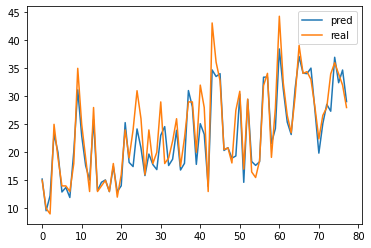

In [82]:
df.plot(kind='line')

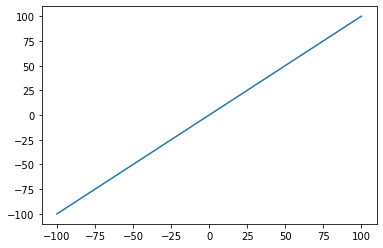

In [90]:
_ = plt.plot([-100, 100], [-100, 100])